In [7]:
!pip install tensorflow

  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247


In [11]:
!pip install mobilenet

ERROR: Could not find a version that satisfies the requirement mobilenet (from versions: none)
ERROR: No matching distribution found for mobilenet


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile=tf.keras.applications.mobilenet.MobileNet()

# Image Preprocessing

1. loading image
2. resizing the image  
3. converting the image into an array
4. expanding the dimensions
5. passing the processed image for further processing 

In [3]:
def prepare_image(file):
    img_path=r'C:\Users\simra\Downloads\Mobile-Net images'
    full_path=img_path+file
    img=image.load_img(full_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded_dims=np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

# Initial Predictions

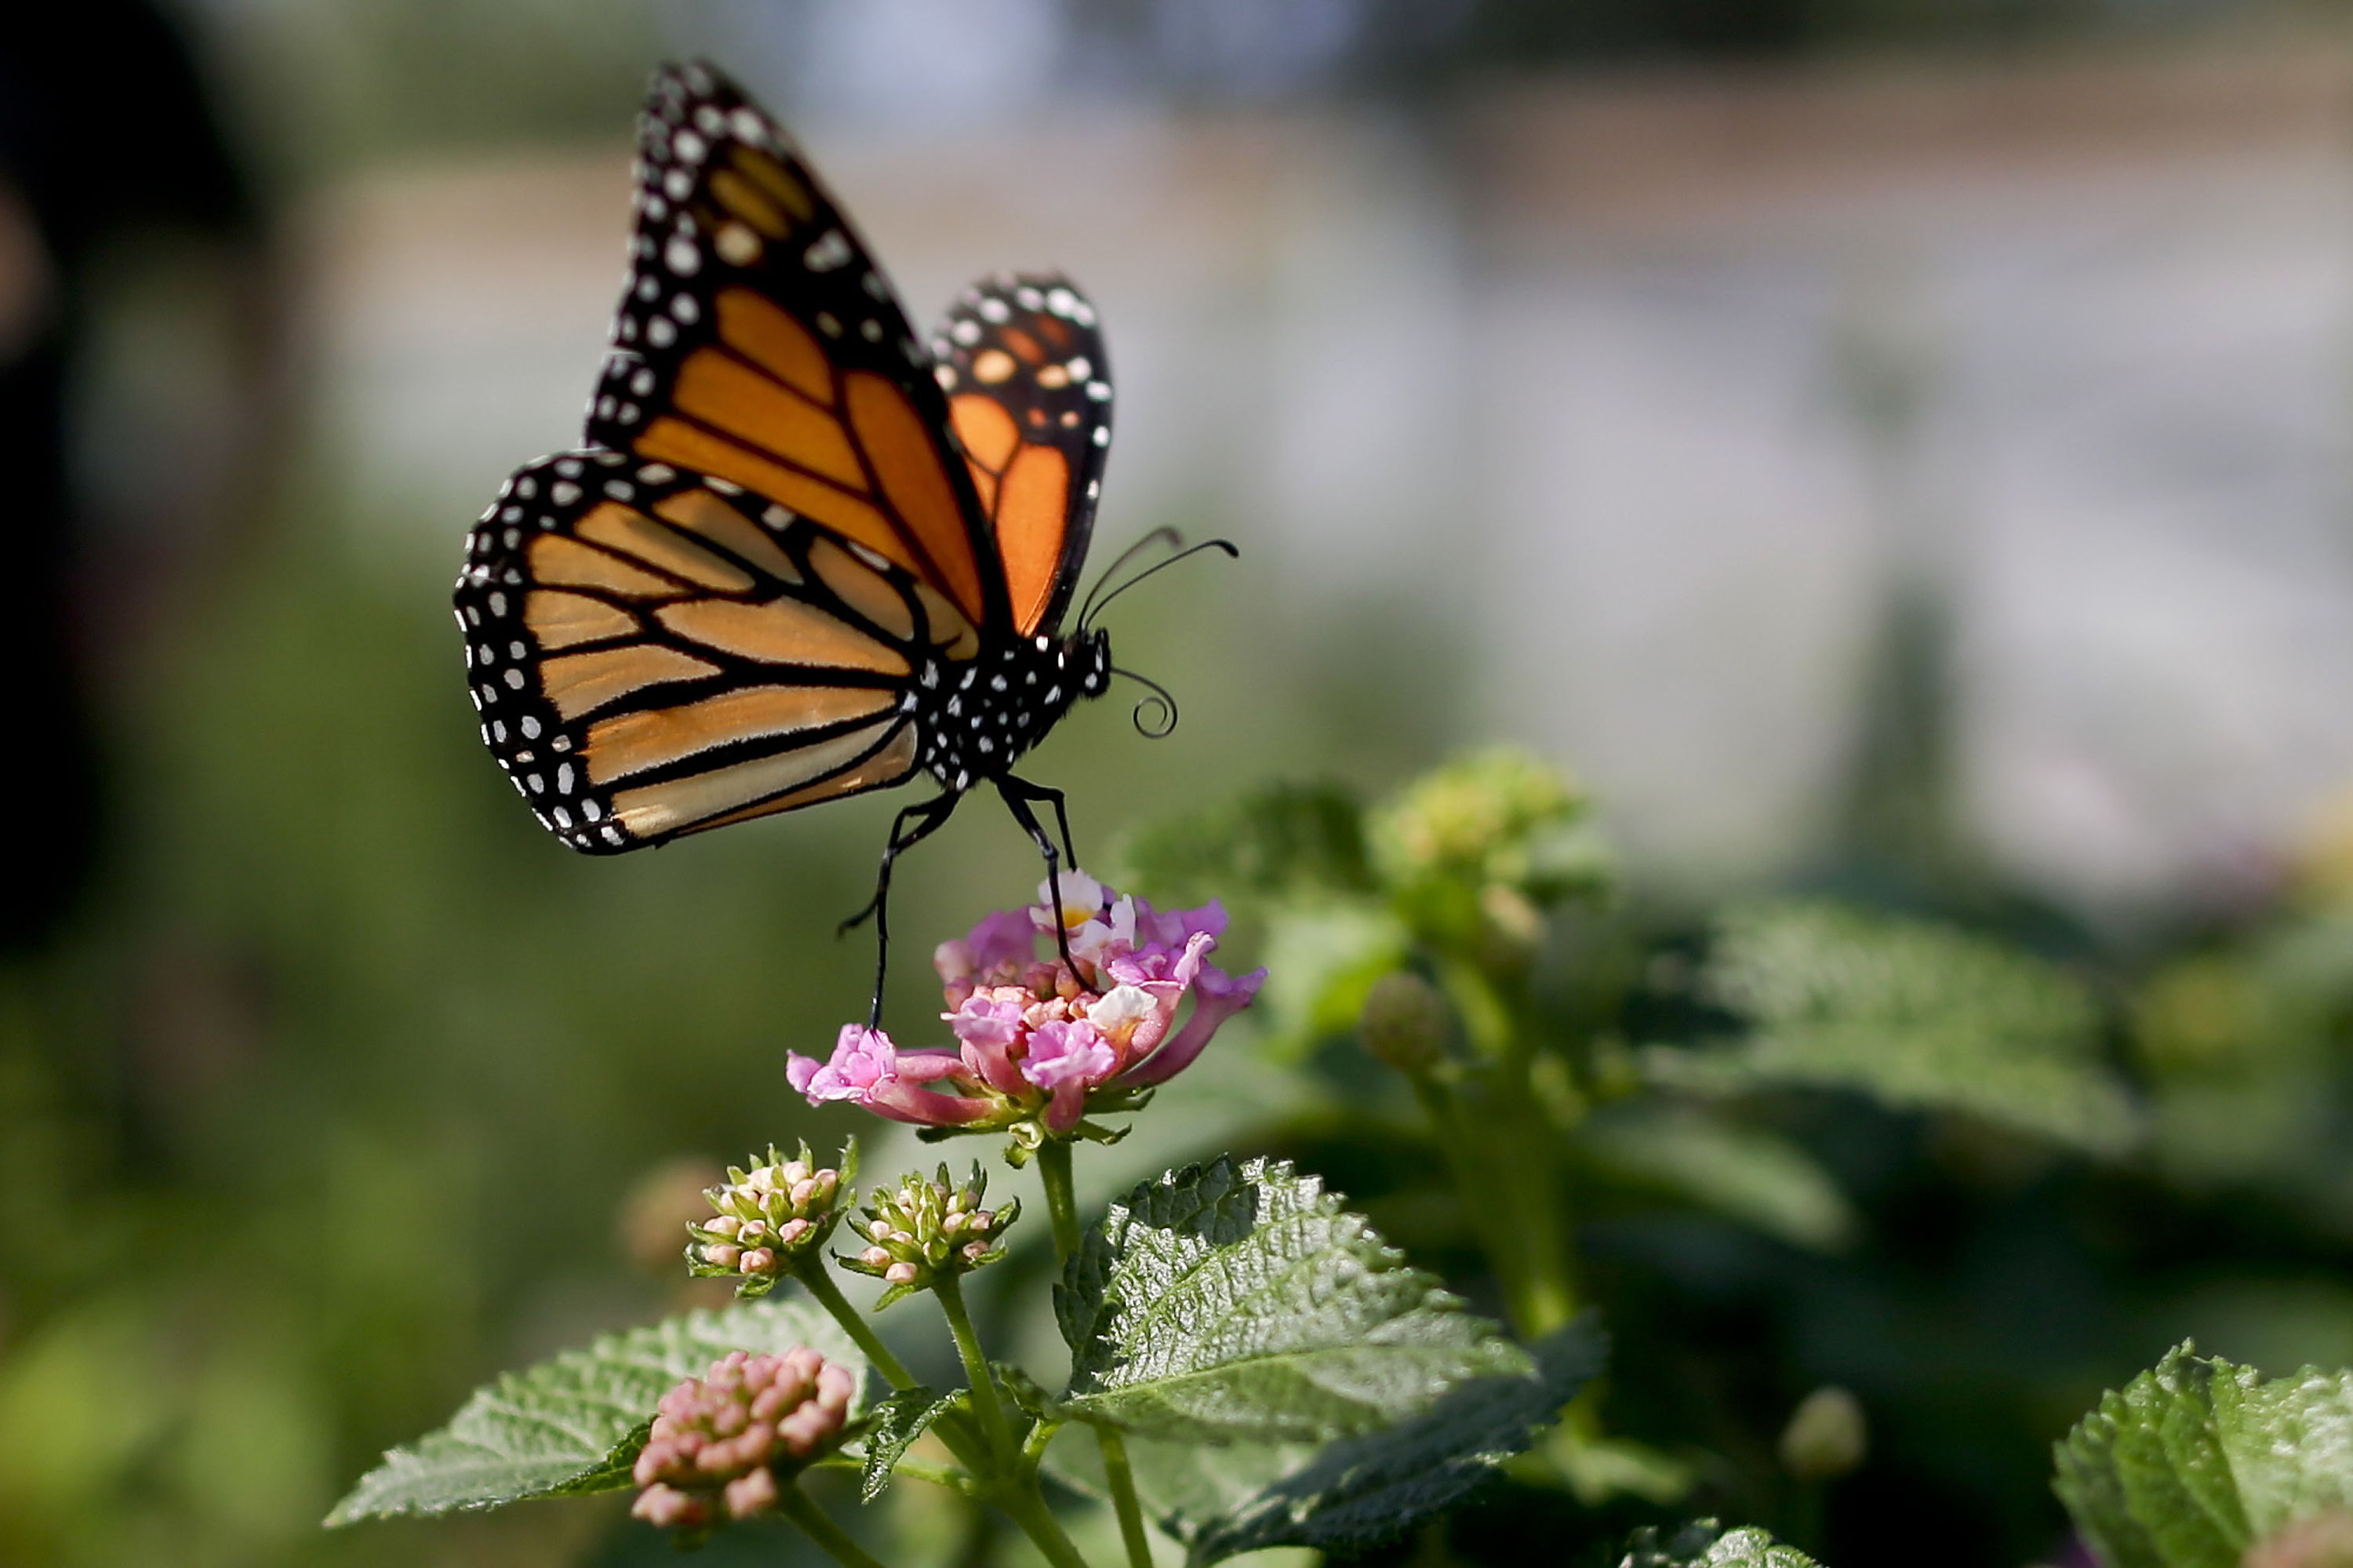

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\simra\Downloads\Mobile-Net images\butterfly1.png',width=300,height=200)

In [5]:
preprocessed_image=prepare_image(r'\butterfly1.png')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 606ms/step


[[('n02279972', 'monarch', 0.99992824),
  ('n02281787', 'lycaenid', 5.230789e-05),
  ('n02276258', 'admiral', 8.379517e-06),
  ('n02277742', 'ringlet', 4.2638803e-06),
  ('n02281406', 'sulphur_butterfly', 3.974806e-06)]]

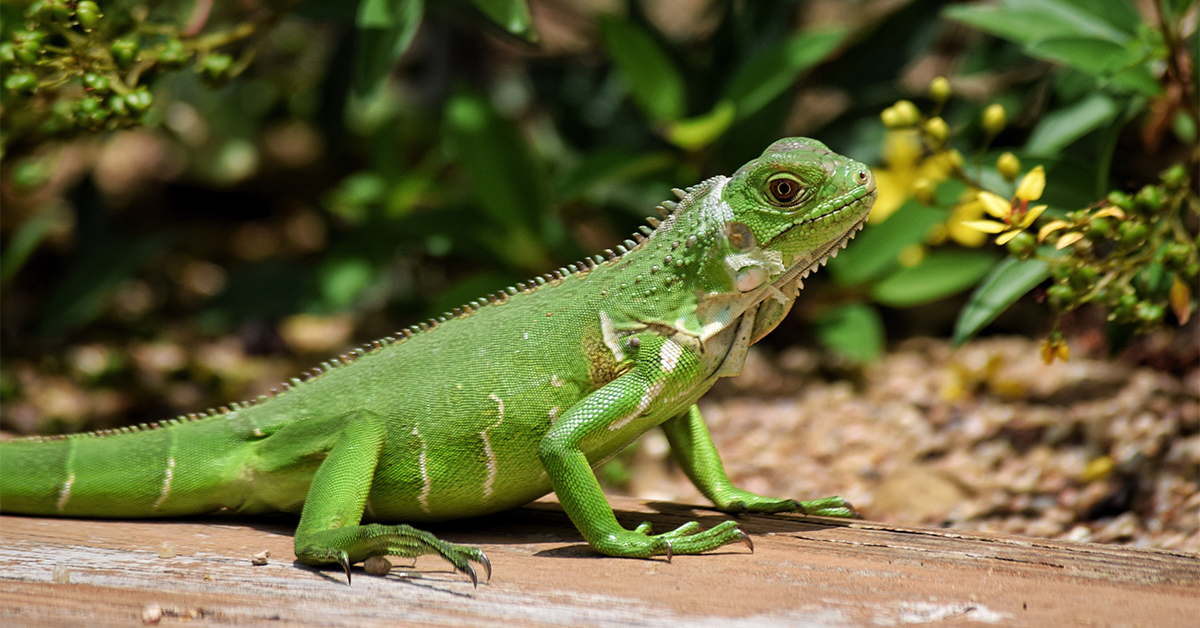

In [6]:
Image(filename=r'C:\Users\simra\Downloads\Mobile-Net images\lizard.png',width=300,height=200)

In [7]:
preprocessed_image=prepare_image(r'\lizard.png')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 43ms/step


[[('n01693334', 'green_lizard', 0.9271924),
  ('n01682714', 'American_chameleon', 0.040631756),
  ('n01677366', 'common_iguana', 0.017769603),
  ('n01694178', 'African_chameleon', 0.012618164),
  ('n01687978', 'agama', 0.00075724797)]]

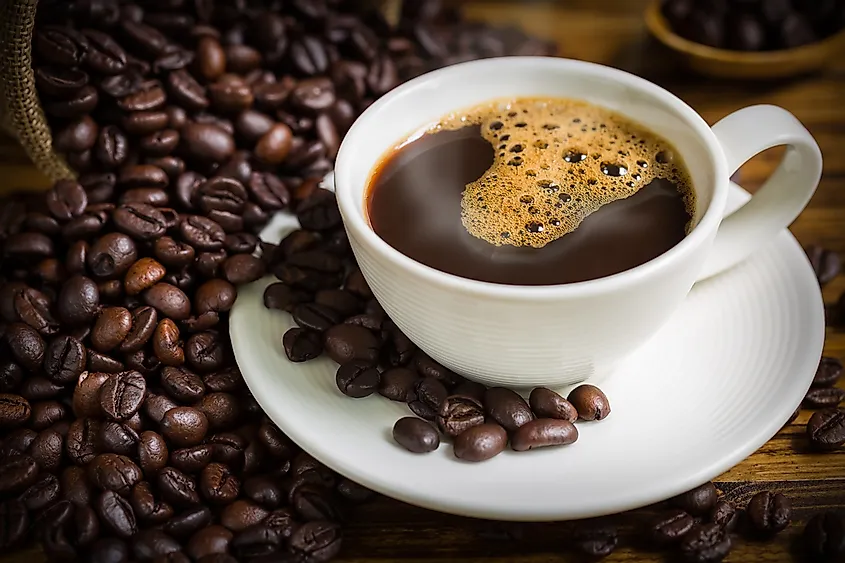

In [8]:
Image(filename=r'C:\Users\simra\Downloads\Mobile-Net images\coffee-cup.png',width=300,height=200)

In [9]:
preprocessed_image=prepare_image(r'\coffee-cup.png')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 32ms/step


[[('n07920052', 'espresso', 0.90252006),
  ('n07930864', 'cup', 0.0871571),
  ('n03063599', 'coffee_mug', 0.0057247756),
  ('n04332243', 'strainer', 0.0018601529),
  ('n03786901', 'mortar', 0.0011599007)]]

## Sign Language Classification

Dataset: https://github.com/ardamavi/Sign-Language-Digits-Dataset

- 10 classes (digits 0-9)
    - Class Data:
        - class 0: 205 images
        - class 1: 206 images
        - class 2: 206 images
        - class 3: 207 images
        - class 4: 207 images
        - class 5: 207 images
        - class 6: 207 images
        - class 7: 206 images
        - class 8: 208 images
        - class 9: 204 images
        

In [10]:
#organising data into train, valid, test dirs
os.chdir(r'C:\Users\simra\Downloads\Sign-Language-Digits-Dataset-master')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        valid_samples=random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
        test_samples=random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')    

In [11]:
train_path=r'C:\Users\simra\Downloads\Sign-Language-Digits-Dataset-master\train'
valid_path=r'C:\Users\simra\Downloads\Sign-Language-Digits-Dataset-master\valid'
test_path=r'C:\Users\simra\Downloads\Sign-Language-Digits-Dataset-master\test'

In [12]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224),batch_size=10,class_mode='categorical')
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224),batch_size=10,class_mode='categorical')
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224),batch_size=10,class_mode='categorical',shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### modifying the model

In [13]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [14]:
x=mobile.layers[-1].output
output=Dense(units=10,activation='softmax')(x)

In [15]:
model=Model(inputs=mobile.input,outputs=output)

In [16]:
#training only last 23 layers, freezing the rest
for layer in model.layers[:-23]:
    layer.trainable=False

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

## Train the Model

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=6,
            verbose=2
)

Epoch 1/6
172/172 - 47s - loss: 2.2541 - accuracy: 0.5175 - val_loss: 2.2413 - val_accuracy: 0.6300 - 47s/epoch - 275ms/step
Epoch 2/6
172/172 - 45s - loss: 2.2070 - accuracy: 0.7827 - val_loss: 2.1978 - val_accuracy: 0.7867 - 45s/epoch - 260ms/step
Epoch 3/6
172/172 - 46s - loss: 2.1807 - accuracy: 0.8096 - val_loss: 2.1749 - val_accuracy: 0.7500 - 46s/epoch - 268ms/step
Epoch 4/6
172/172 - 48s - loss: 2.1579 - accuracy: 0.7979 - val_loss: 2.1492 - val_accuracy: 0.7800 - 48s/epoch - 280ms/step
Epoch 5/6
172/172 - 51s - loss: 2.1335 - accuracy: 0.7956 - val_loss: 2.1260 - val_accuracy: 0.7767 - 51s/epoch - 295ms/step
Epoch 6/6
172/172 - 61s - loss: 2.1117 - accuracy: 0.7926 - val_loss: 2.1203 - val_accuracy: 0.7233 - 61s/epoch - 355ms/step


In [20]:
test_labels = test_batches.classes

In [21]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [22]:
print(predictions)

[[0.12654616 0.09333941 0.09543266 0.10107482 0.09568541 0.09941506
  0.09800682 0.10297927 0.09371009 0.09381034]
 [0.12654586 0.09333966 0.09543257 0.10107474 0.09568547 0.09941494
  0.09800685 0.10297931 0.09371018 0.09381045]
 [0.12654623 0.09333938 0.09543261 0.10107481 0.0956854  0.09941506
  0.09800681 0.10297926 0.09371008 0.09381033]
 [0.1265461  0.09333949 0.09543259 0.10107478 0.09568543 0.09941501
  0.09800682 0.10297927 0.09371012 0.09381037]
 [0.12654622 0.09333941 0.09543262 0.10107481 0.09568541 0.09941506
  0.09800682 0.10297927 0.09371009 0.09381035]
 [0.09381734 0.12225705 0.09586024 0.0950315  0.09209921 0.10453717
  0.09659782 0.10020857 0.09647961 0.10311148]
 [0.09382534 0.1221349  0.09597126 0.09506925 0.09210154 0.1045193
  0.0966179  0.10022649 0.09646817 0.10306595]
 [0.09382094 0.12221066 0.09588802 0.09503973 0.09210484 0.10453085
  0.09660079 0.10021102 0.09648667 0.10310652]
 [0.09381805 0.12224471 0.09587008 0.09503468 0.09209991 0.10453554
  0.09659937 

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [24]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 1 1]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 3 0 1 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 5 0]]


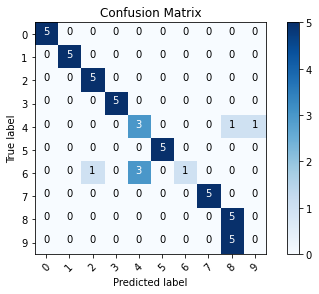

In [26]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [27]:
model.save("./saved_model")

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


# Post-Training Quantization

### Dyanamic Quantization

In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

In [29]:
tflite_model=converter.convert()

In [30]:
len(tflite_model) #size of model without quantization

16941760

In [32]:

import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [33]:
len(tflite_quant_model)

4432208

### Full Integer Quantization (with float fallback)

In [34]:
type(train_batches)

keras.preprocessing.image.DirectoryIterator

In [35]:
x=np.concatenate([train_batches.next()[0] for i in range(train_batches.__len__())])
x.astype(np.float32)/255.03

array([[[[ 5.99698978e-04,  4.76683839e-04,  3.84422485e-04],
         [ 5.99698978e-04,  4.76683839e-04,  3.84422485e-04],
         [ 6.61206548e-04,  5.38191409e-04,  4.45930054e-04],
         ...,
         [-1.69145802e-04, -2.92160927e-04, -2.61407142e-04],
         [-2.30653357e-04, -3.53668496e-04, -3.22914711e-04],
         [-2.30653357e-04, -3.53668496e-04, -3.22914711e-04]],

        [[ 5.99698978e-04,  4.76683839e-04,  3.84422485e-04],
         [ 5.99698978e-04,  4.76683839e-04,  3.84422485e-04],
         [ 6.61206548e-04,  5.38191409e-04,  4.45930054e-04],
         ...,
         [-1.69145802e-04, -2.92160927e-04, -2.61407142e-04],
         [-2.30653357e-04, -3.53668496e-04, -3.22914711e-04],
         [-2.30653357e-04, -3.53668496e-04, -3.22914711e-04]],

        [[ 6.30452763e-04,  5.07437624e-04,  4.15176270e-04],
         [ 6.30452763e-04,  5.07437624e-04,  4.15176270e-04],
         [ 6.91960333e-04,  5.68945194e-04,  4.76683839e-04],
         ...,
         [-1.38392017e-0

In [36]:
print(x)

[[[[ 0.15294123  0.12156868  0.09803927]
   [ 0.15294123  0.12156868  0.09803927]
   [ 0.1686275   0.13725495  0.11372554]
   ...
   [-0.04313725 -0.0745098  -0.06666666]
   [-0.05882353 -0.09019607 -0.08235294]
   [-0.05882353 -0.09019607 -0.08235294]]

  [[ 0.15294123  0.12156868  0.09803927]
   [ 0.15294123  0.12156868  0.09803927]
   [ 0.1686275   0.13725495  0.11372554]
   ...
   [-0.04313725 -0.0745098  -0.06666666]
   [-0.05882353 -0.09019607 -0.08235294]
   [-0.05882353 -0.09019607 -0.08235294]]

  [[ 0.16078436  0.12941182  0.10588241]
   [ 0.16078436  0.12941182  0.10588241]
   [ 0.17647064  0.14509809  0.12156868]
   ...
   [-0.03529412 -0.06666666 -0.05882353]
   [-0.05098039 -0.08235294 -0.0745098 ]
   [-0.05098039 -0.08235294 -0.0745098 ]]

  ...

  [[ 0.02745104  0.00392163 -0.03529412]
   [ 0.02745104  0.00392163 -0.03529412]
   [ 0.02745104  0.00392163 -0.03529412]
   ...
   [-0.1372549  -0.16862744 -0.17647058]
   [-0.14509803 -0.17647058 -0.18431371]
   [-0.14509803 

In [38]:

def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(x).batch(1).take(100):
        yield [input_value]
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
full_int_quant_model = converter.convert()


In [39]:
len(full_int_quant_model)

4574280

### Integer Only

In [40]:

converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model_int = converter.convert()

In [41]:
len(tflite_quant_model_int)

4573912

### Float16 quantization

In [43]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model_float16 = converter.convert()

In [44]:
len(tflite_quant_model_float16)

8487704

### 16 bit activation with 8 bit weights

In [45]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.representative_dataset = representative_data_gen
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]
tflite_quant_model_exp = converter.convert()

In [46]:
len(tflite_quant_model_exp)

4718952

# QUANTIZED AWARE TRAINING

In [47]:
!pip install tensorflow_model_optimization

  Using cached tensorflow_model_optimization-0.7.2-py2.py3-none-any.whl (237 kB)


In [48]:
import tensorflow_model_optimization as tfmot

In [49]:
quantize_model=tfmot.quantization.keras.quantize_model
q_aware_model=quantize_model(model)

In [50]:
q_aware_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
q_aware_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 quantize_layer (QuantizeLay  (None, 224, 224, 3)      3         
 er)                                                             
                                                                 
 quant_conv1 (QuantizeWrappe  (None, 112, 112, 32)     929       
 rV2)                                                            
                                                                 
 quant_conv1_bn (QuantizeWra  (None, 112, 112, 32)     129       
 pperV2)                                                         
                                                                 
 quant_conv1_relu (QuantizeW  (None, 112, 112, 32)     3         
 rapperV2)                                                   

                                                                 
 quant_conv_pw_6 (QuantizeWr  (None, 14, 14, 512)      132097    
 apperV2)                                                        
                                                                 
 quant_conv_pw_6_bn (Quantiz  (None, 14, 14, 512)      2049      
 eWrapperV2)                                                     
                                                                 
 quant_conv_pw_6_relu (Quant  (None, 14, 14, 512)      3         
 izeWrapperV2)                                                   
                                                                 
 quant_conv_dw_7 (QuantizeWr  (None, 14, 14, 512)      4611      
 apperV2)                                                        
                                                                 
 quant_conv_dw_7_bn (Quantiz  (None, 14, 14, 512)      2049      
 eWrapperV2)                                                     
          

 zeWrapperV2)                                                    
                                                                 
 quant_conv_dw_13_relu (Quan  (None, 7, 7, 1024)       3         
 tizeWrapperV2)                                                  
                                                                 
 quant_conv_pw_13 (QuantizeW  (None, 7, 7, 1024)       1050625   
 rapperV2)                                                       
                                                                 
 quant_conv_pw_13_bn (Quanti  (None, 7, 7, 1024)       4097      
 zeWrapperV2)                                                    
                                                                 
 quant_conv_pw_13_relu (Quan  (None, 7, 7, 1024)       3         
 tizeWrapperV2)                                                  
                                                                 
 quant_global_average_poolin  (None, 1, 1, 1024)       3         
 g2d (Quan

In [52]:
q_aware_model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=6,
            verbose=2
)

Epoch 1/6
172/172 - 164s - loss: 2.1390 - accuracy: 0.7494 - val_loss: 2.1711 - val_accuracy: 0.6167 - 164s/epoch - 956ms/step
Epoch 2/6
172/172 - 195s - loss: 2.0707 - accuracy: 0.7874 - val_loss: 2.0693 - val_accuracy: 0.7600 - 195s/epoch - 1s/step
Epoch 3/6
172/172 - 228s - loss: 2.0432 - accuracy: 0.7973 - val_loss: 2.0529 - val_accuracy: 0.7400 - 228s/epoch - 1s/step
Epoch 4/6
172/172 - 225s - loss: 2.0217 - accuracy: 0.7950 - val_loss: 2.0153 - val_accuracy: 0.7867 - 225s/epoch - 1s/step
Epoch 5/6
172/172 - 231s - loss: 2.0042 - accuracy: 0.7891 - val_loss: 2.0013 - val_accuracy: 0.7800 - 231s/epoch - 1s/step
Epoch 6/6
172/172 - 226s - loss: 1.9810 - accuracy: 0.7956 - val_loss: 2.0155 - val_accuracy: 0.6933 - 226s/epoch - 1s/step


In [53]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\simra\AppData\Local\Temp\tmpnjzoz0u1\assets


INFO:tensorflow:Assets written to: C:\Users\simra\AppData\Local\Temp\tmpnjzoz0u1\assets
C:\Users\simra\anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [55]:
len(tflite_quant_model)

4576136